# Job Industry Classification Task
## Submitted By: Reham ElTagoury

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for creating the feature vector
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
# Handling imbalanced data and model creation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
# for saving the model
import joblib
# for saving the vectorizor 
import pickle

## Loading the Data

In [2]:
data=pd.read_csv("C:/Users/user/Downloads/RehamElTagoury_IndustryClassificationTask/Job titles and industries.csv")
data.head(20)

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT
5,privileged access management expert,IT
6,devops engineers x 3 - global brand,IT
7,devops engineers x 3 - global brand,IT
8,data modeller,IT
9,"php web developer £45,000 based in london",IT


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


### probems need to be solved:


*  Special Characters in job title 
* Duplicates
* Imbalanced Data




 ## Handling Special Characters


In [4]:
jobs=[]
for job in data['job title']:
    job = job.replace("[^A-Za-z]+"," ")
    # removing frank sign
    job = job.replace("£"," ")
    jobs.append(job)
data_new=pd.DataFrame(jobs,columns = ['job title'])
data_new['industry']=data['industry']
data_new.head(50)

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT
5,privileged access management expert,IT
6,devops engineers x 3 - global brand,IT
7,devops engineers x 3 - global brand,IT
8,data modeller,IT
9,"php web developer 45,000 based in london",IT


## Handling Duplicates

In [5]:
data_new.duplicated().sum()

4618

In [6]:
# droping duplicates
data_new.drop_duplicates(inplace=True)

In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3968 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  3968 non-null   object
 1   industry   3968 non-null   object
dtypes: object(2)
memory usage: 93.0+ KB


## Visualizing the target

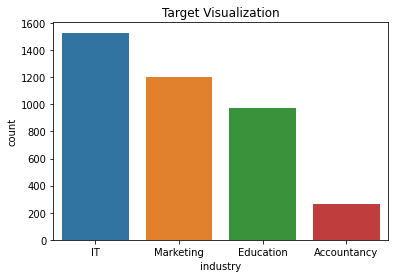

In [8]:
sns.countplot(x='industry',data=data_new).set_title("Target Visualization");

In [9]:
data_new.shape

(3968, 2)

In [10]:
data_new.industry.value_counts()

IT             1529
Marketing      1203
Education       973
Accountancy     263
Name: industry, dtype: int64

## Creating the Feature Vector

In [11]:

Feature_vector = TfidfVectorizer(sublinear_tf= True ,min_df = 5,norm = 'max' ,ngram_range = (1,2) ,stop_words = 'english')
features = Feature_vector.fit_transform(data_new['job title']).toarray()
print(features.shape)

(3968, 775)


In [12]:
count_vector = CountVectorizer()
X_train_vectorized = count_vector.fit_transform(data_new['job title'])
tfidf= TfidfTransformer()
X_train_transformed = tfidf.fit_transform(X_train_vectorized)

## Handling Imbalanced Data and Model Creation



*   After removing the duplicates we will balance the data using oversampling smote



In [13]:

steps = [('over', SMOTE()), ('model', LinearSVC())]
pipeline = Pipeline(steps=steps)
scores = cross_val_score(pipeline,X_train_transformed, data_new['industry'], scoring='accuracy', cv=10, n_jobs=-1)
print(scores)

[0.89420655 0.90680101 0.90428212 0.94206549 0.91939547 0.9093199
 0.88664987 0.81360202 0.75       0.82070707]


In [15]:
# Fitting and Evalating the model
pipeline.fit(X_train_transformed, data_new['industry'])
pipeline.predict(count_vector.transform(['Data Scientist']))

array(['IT'], dtype=object)

## Saving the model

In [16]:
filename = 'model.sav'
joblib.dump(pipeline,filename)

['model.sav']

In [19]:
# just for checking that i saved it correctly
loaded_model = joblib.load(filename)
result = loaded_model.score(X_train_transformed, data_new['industry'])
print(result)

0.9526209677419355


In [20]:
loaded_model.predict(count_vector.transform(['physics Teacher']))

array(['Education'], dtype=object)

## Saving the vectorizer 

In [21]:
pickle.dump(count_vector, open("vectorizer.pickle", "wb")) #Save vectorizer

# Answering the Questions 
- Which techniques you have used while cleaning the data if you have cleaned it?
 * Removing Duplicates
 * Removing Special Characters
- Why have you chosen this classifier? 
 * I chose two models SVM becuase  It can solve linear and non-linear problems and Descision Tree for it's simplicity
 * The Linear SVM gave higher accuracy
- How do you deal with (Imbalance learning)?
 * There are plenty of techniques like undersampling but when I removed the duplicates the amount of data decreased so I wanted to overcome this decreses so I used oversampling with SMOTE as it increases the rare classes to give a good distribution.
- How can you extend the model to have better performance?
 * We can make a further feature extraction as I noticed in some rows there is an info about the salary so I can Extract that to get a salary column as it can affect the prediction as each industry have it's own salary ranges
 * We can increase the number of K fold cross validation and tune the model more

- How do you evaluate your model?
 * Using Accuracy metric
- What are the limitations of your methodology or Where does your approach fail?
 * If I get a new Job title and Write for example "Physics department manager" this is suppose to be an educational position bt it classify it as an IT position Which means that the model is biased as it doesn't have enough data
